# Nomic Q5_K_M time stability
So in the previous notebook we discovered that nomic embed text with Q5_K_M quantization was the most similar embedding to OpenAI embedding system.

And the mean spending time on embedding a sentence for Q5_K_M took the third place with 0.027150(s) from 14 embedding model and it's GREAT.

So we want to check if this model spending time the same or not, for this we use the same sentences for this test.

In [1]:
# 100 random Persian sentences with varying levels of similarity, ranging from low to very high.
persian_sentences = {
	0: "دیروز به پارک رفتم و دویدم.",
	1: "کتابی که به تازگی خریدم خیلی جذاب است.",
	2: "هوا امروز بسیار گرم بود.",
	3: "من و دوستانم دیشب فیلم تماشا کردیم.",
	4: "او در یک شرکت بزرگ کار می‌کند.",
	5: "امروز صبح یک لیوان چای نوشیدم.",
	6: "فصل پاییز بهترین زمان برای پیاده‌روی است.",
	7: "هفته آینده به مسافرت می‌روم.",
	8: "گربه من همیشه روی مبل می‌خوابد.",
	9: "از خرید در فروشگاه‌های شلوغ خوشم نمی‌آید.",
	10: "او هر روز ساعت هشت صبح بیدار می‌شود.",
	11: "دیشب برای شام پیتزا خوردیم.",
	12: "ماشینم امروز خراب شد و به تعمیرگاه بردم.",
	13: "من عاشق گل‌های بهاری هستم.",
	14: "برای ناهار یک ساندویچ درست کردم.",
	15: "او در حال خواندن یک کتاب تاریخی است.",
	16: "دیروز هوا خیلی سرد بود و برف بارید.",
	17: "من و خانواده‌ام همیشه در تابستان به شمال می‌رویم.",
	18: "این هفته قصد دارم خانه را تمیز کنم.",
	19: "به تازگی یک لپ‌تاپ جدید خریدم.",
	20: "او دوست دارد هر روز صبح پیاده‌روی کند.",
	21: "دیروز در مسابقه دو شرکت کردم.",
	22: "من عاشق شنیدن موسیقی کلاسیک هستم.",
	23: "این زمستان خیلی سردتر از سال‌های قبل بود.",
	24: "من همیشه صبح‌ها قهوه می‌نوشم.",
	25: "او تصمیم گرفت که در کلاس زبان ثبت‌نام کند.",
	26: "دیشب خواب عجیبی دیدم.",
	27: "به نظرم فیلم‌های کمدی بهترین فیلم‌ها هستند.",
	28: "من و خواهرم دیشب به سینما رفتیم.",
	29: "او هر روز صبح ورزش می‌کند.",
	30: "در بهار باغچه‌ام را پر از گل می‌کنم.",
	31: "کتابی که اخیراً خواندم درباره تاریخ ایران بود.",
	32: "دوست دارم هر روز صبح زود بیدار شوم.",
	33: "او عاشق نقاشی است و هر روز نقاشی می‌کشد.",
	34: "هفته گذشته به یک نمایشگاه هنری رفتم.",
	35: "او همیشه در کارهای گروهی مشارکت می‌کند.",
	36: "من عاشق تماشای غروب خورشید هستم.",
	37: "او به تازگی یک گلدان جدید خریده است.",
	38: "من همیشه در کلاس ریاضی موفق بوده‌ام.",
	39: "این پاییز برگ‌های درختان خیلی زیباست.",
	40: "او هر روز یک ساعت مطالعه می‌کند.",
	41: "من به تازگی یادگیری زبان جدیدی را شروع کردم.",
	42: "دیشب برای شام پاستا پختم.",
	43: "او همیشه از طبیعت لذت می‌برد.",
	44: "من به موسیقی سنتی علاقه دارم.",
	45: "هوا امروز خیلی ابری است.",
	46: "او تصمیم گرفت که به کلاس ورزش برود.",
	47: "من عاشق خواندن کتاب‌های داستانی هستم.",
	48: "به تازگی یک کتاب درباره تاریخ جهان خواندم.",
	49: "او همیشه به موقع به مدرسه می‌رود.",
	50: "دیروز با دوستم به خرید رفتم.",
	51: "من به تازگی شروع به یادگیری پیانو کردم.",
	52: "او در حال یادگیری نقاشی است.",
	53: "هر سال تابستان به مسافرت می‌رویم.",
	54: "من عاشق عطر گل‌های بهاری هستم.",
	55: "او هر روز صبحانه می‌خورد.",
	56: "دیشب با دوستانم به رستوران رفتیم.",
	57: "من همیشه در امتحانات موفق بوده‌ام.",
	58: "او هر روز یک ساعت مطالعه می‌کند.",
	59: "به تازگی یک کتاب درباره تاریخ جهان خواندم.",
	60: "او هر هفته به کلاس موسیقی می‌رود.",
	61: "من به تازگی شروع به دویدن کردم.",
	62: "او همیشه برای درس‌هایش تلاش می‌کند.",
	63: "من عاشق تماشای فیلم‌های ترسناک هستم.",
	64: "او تصمیم گرفت که یک سفر کوتاه داشته باشد.",
	65: "من هر روز صبح زود بیدار می‌شوم.",
	66: "او عاشق سفر به کوهستان است.",
	67: "دیروز یک جفت کفش جدید خریدم.",
	68: "من عاشق طبیعت هستم و هر هفته به کوه می‌روم.",
	69: "او هر شب قبل از خواب کتاب می‌خواند.",
	70: "من هر روز صبحانه می‌خورم.",
	71: "او به تازگی یک نقاشی از طبیعت کشیده است.",
	72: "هر سال تابستان به شمال می‌رویم.",
	73: "من به تازگی شروع به یادگیری زبان فرانسه کردم.",
	74: "او عاشق شنیدن موسیقی است.",
	75: "دیشب خواب دیدم که به یک سفر طولانی رفتم.",
	76: "من همیشه در کلاس‌های هنر شرکت می‌کنم.",
	77: "او هر روز صبح پیاده‌روی می‌کند.",
	78: "دیروز برای اولین بار به یک کلاس آشپزی رفتم.",
	79: "من عاشق کتاب‌های معمایی هستم.",
	80: "او هر روز صبح زود بیدار می‌شود.",
	81: "من هر هفته به کتابخانه می‌روم.",
	82: "او به تازگی یک کتاب درباره تاریخ خوانده است.",
	83: "دیشب با دوستانم فیلم تماشا کردم.",
	84: "من عاشق دیدن گل‌های بهاری هستم.",
	85: "او هر هفته به پارک می‌رود.",
	86: "دیروز با خانواده‌ام به پیک‌نیک رفتیم.",
	87: "من هر روز صبح دویدن را دوست دارم.",
	88: "او عاشق هنر و نقاشی است.",
	89: "من همیشه در کلاس‌های ریاضی موفق بوده‌ام.",
	90: "او هر روز صبحانه می‌خورد.",
	91: "به تازگی یک کتاب درباره تاریخ خوانده‌ام.",
	92: "من عاشق نوشیدن قهوه در صبح هستم.",
	93: "او هر روز به مدرسه می‌رود.",
	94: "دیروز یک فیلم دیدم که بسیار جالب بود.",
	95: "من هر هفته به ورزشگاه می‌روم.",
	96: "او هر روز یک ساعت تمرین پیانو می‌کند.",
	97: "دیشب خواب دیدم که در یک شهر دیگر هستم.",
	98: "من عاشق سفر به جاهای جدید هستم.",
	99: "او هر روز در پارک پیاده‌روی می‌کند.",
}

we use lm-studio to run `nomic embed text v1.5 Q5_K_M` and connect with the original settings in lm-studio.

In [2]:
from openai import OpenAI
from time import time
client = OpenAI(base_url="http://localhost:1234/v1", api_key="lm-studio")

def get_embedding(text, model="nomic-ai/nomic-embed-text-v1.5-GGUF"):
    text = text.replace("\n", " ")
    a = time()    
    embedded_text = client.embeddings.create(input = [text], model=model).data[0].embedding
    b = time()

    return (embedded_text, b - a)

we run 100 times to make sure that there is no luck in this process.

In [3]:
all_elapsed_times = {}

for run_number in range(1,101):
    each_elapsed_times = {}
    print(f"run number: {run_number} started!")
    for key, value in persian_sentences.items():
        _, elapsed_time = get_embedding(value)
        each_elapsed_times[key] = elapsed_time
    print(f"run number: {run_number} finished!")
    all_elapsed_times[run_number] = each_elapsed_times

run number: 1 started!
run number: 1 finished!
run number: 2 started!
run number: 2 finished!
run number: 3 started!
run number: 3 finished!
run number: 4 started!
run number: 4 finished!
run number: 5 started!
run number: 5 finished!
run number: 6 started!
run number: 6 finished!
run number: 7 started!
run number: 7 finished!
run number: 8 started!
run number: 8 finished!
run number: 9 started!
run number: 9 finished!
run number: 10 started!
run number: 10 finished!
run number: 11 started!
run number: 11 finished!
run number: 12 started!
run number: 12 finished!
run number: 13 started!
run number: 13 finished!
run number: 14 started!
run number: 14 finished!
run number: 15 started!
run number: 15 finished!
run number: 16 started!
run number: 16 finished!
run number: 17 started!
run number: 17 finished!
run number: 18 started!
run number: 18 finished!
run number: 19 started!
run number: 19 finished!
run number: 20 started!
run number: 20 finished!
run number: 21 started!
run number: 21

In [37]:
import pandas as pd


mean_elapsed_time = pd.DataFrame(all_elapsed_times).mean(axis=0).to_frame().rename({0: "Mean of elapsed time for each run"}, axis=1)
sum_elapsed_time = pd.DataFrame(all_elapsed_times).sum(axis=0).to_frame().rename({0: "Sum of elapsed time for each run"}, axis=1)

<Axes: >

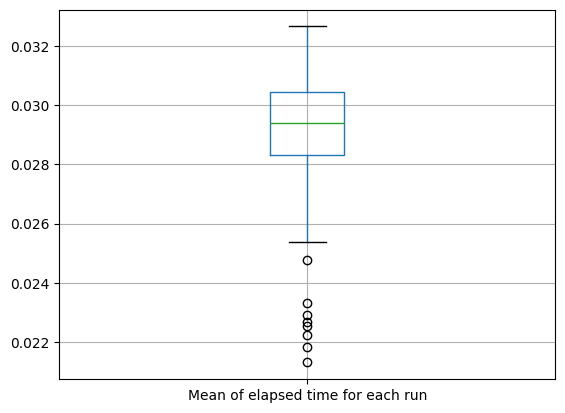

In [48]:
mean_elapsed_time.boxplot()

In [43]:
pd.concat([mean_elapsed_time, sum_elapsed_time], axis=1).describe()

,Mean of elapsed time for each run,Sum of elapsed time for each run
count,100.000000,100.000000
mean,0.029028,2.902795
std,0.002287,0.228741
min,0.021320,2.131974
25%,0.028329,2.832933
50%,0.029397,2.939687
75%,0.030435,3.043536
max,0.032648,3.264787


In [61]:
Q1 = float(mean_elapsed_time.quantile(0.25).iloc[0])
Q3 = float(mean_elapsed_time.quantile(0.75).iloc[0])

IQR = Q3 - Q1

lower_boundary = Q1 - 1.5 * IQR
upper_boundary = Q3 + 1.5 * IQR

print("With the above informations:")
print(f"Q1 (25th percentile): {Q1}")
print(f"Q3 (75th percentile): {Q3}")
print(f"IQR: {IQR}")
print(f"Lower Boundary: {lower_boundary}")
print(f"Upper Boundary: {upper_boundary}")

# Mean elapsed time(s) from the previous notebook
data = 0.027150
if lower_boundary < data < upper_boundary:
    print(f"{data}(s) is not an outlier.")
else:
    print(f"{data}(s) is an outlier.")

With the above informations:
Q1 (25th percentile): 0.02832933008670807
Q3 (75th percentile): 0.030435361862182618
IQR: 0.002106031775474547
Lower Boundary: 0.02517028242349625
Upper Boundary: 0.03359440952539444
0.02715(s) is not an outlier.


so from the above information we can say that the 0.027150(s) that Q5_K_M get from the previous notebook is not an outlier or a lucky time for this model.

and we can 